In [1]:
import pqmodel
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

In [50]:
num_train = 1000
num_test = 200
sampling_frequency = 16000
fundemental_frequency = 50
num_cycles = 10
amplitude = 1

train_df = pqmodel.pqmodel_df(num_samples=num_train,
                       samp_freq=sampling_frequency,
                       fund_freq=fundemental_frequency,
                       num_cycles=num_cycles,
                       amplitude=amplitude)

test_df = pqmodel.pqmodel_df(num_samples=num_test,
                       samp_freq=sampling_frequency,
                       fund_freq=fundemental_frequency,
                       num_cycles=num_cycles,
                       amplitude=amplitude)


train_df['class'] = train_df['class']-1
train_df

,id,class,s0,s1,s2,s3,s4,s5,s6,s7,...,s3190,s3191,s3192,s3193,s3194,s3195,s3196,s3197,s3198,s3199
0,0,0,-0.918443,-0.926032,-0.933264,-0.940136,-0.946646,-0.952791,-0.958569,-0.963977,...,-0.823626,-0.834603,-0.845257,-0.855585,-0.865584,-0.875249,-0.884577,-0.893563,-0.902205,-0.910500
1,1,0,-0.557961,-0.574147,-0.590111,-0.605848,-0.621352,-0.636615,-0.651634,-0.666401,...,-0.385341,-0.403384,-0.421272,-0.438997,-0.456553,-0.473933,-0.491130,-0.508138,-0.524950,-0.541560
2,2,0,0.715879,0.702032,0.687915,0.673532,0.658890,0.643994,0.628849,0.613462,...,0.838340,0.827475,0.816291,0.804793,0.792984,0.780869,0.768454,0.755742,0.742739,0.729449
3,3,0,-0.517798,-0.534495,-0.550986,-0.567265,-0.583324,-0.599159,-0.614763,-0.630130,...,-0.340949,-0.359340,-0.377593,-0.395701,-0.413656,-0.431451,-0.449080,-0.466536,-0.483812,-0.500902
4,4,0,-0.739036,-0.725667,-0.712018,-0.698095,-0.683902,-0.669446,-0.654732,-0.639765,...,-0.856261,-0.845954,-0.835321,-0.824367,-0.813094,-0.801508,-0.789613,-0.777413,-0.764914,-0.752120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,28995,28,0.002541,0.022174,0.041798,0.061407,0.080992,0.100545,0.120060,0.139529,...,-0.192598,-0.173295,-0.153924,-0.134495,-0.115014,-0.095488,-0.075926,-0.056334,-0.036721,-0.017093
28996,28996,28,-0.022415,-0.002782,0.016852,0.036480,0.056093,0.075685,0.095248,0.114774,...,-0.217026,-0.197818,-0.178535,-0.159182,-0.139768,-0.120300,-0.100786,-0.081232,-0.061648,-0.042040
28997,28997,28,0.218881,0.237996,0.257020,0.275944,0.294763,0.313467,0.332051,0.350507,...,0.024315,0.043939,0.063545,0.083127,0.102676,0.122186,0.141649,0.161058,0.180404,0.199681
28998,28998,28,0.631950,0.647044,0.661889,0.676479,0.690808,0.704871,0.718662,0.732176,...,0.468610,0.485865,0.502931,0.519804,0.536477,0.552943,0.569195,0.585229,0.601036,0.616612


In [18]:
train_data = train_df[[f's{i}' for i in range(int(sampling_frequency*num_cycles/fundemental_frequency))]].to_numpy()
train_data = train_data.reshape(-1, train_data.shape[1], 1)
train_labels = np.array(train_df['class']).reshape(-1, 1)

test_data = test_df[[f's{i}' for i in range(int(sampling_frequency*num_cycles/fundemental_frequency))]].to_numpy()
test_data = test_data.reshape(-1, train_data.shape[1], 1)
test_labels = np.array(test_df['class']).reshape(-1, 1)

In [22]:
test_data.shape

(5800, 3200, 1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout

model = Sequential()
model.add(Conv1D(100, 10, activation='relu', input_shape=(train_data.shape[1], 1)))
model.add(Conv1D(100, 10, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(160, 10, activation='relu'))
model.add(Conv1D(160, 10, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(29, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 3191, 100)         1100      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 3182, 100)         100100    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1060, 100)         0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1051, 160)         160160    
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 1042, 160)         256160    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 160)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 160)              

In [24]:
from tensorflow.keras.utils import to_categorical

model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

EPOCHS = 20

history = model.fit(train_data[:],
                      to_categorical(train_labels[:]),
                      epochs=EPOCHS)

Train on 29000 samples
Epoch 1/20
29000/29000 [==============================] - 1463s 50ms/sample - loss: 2.2104 - accuracy: 0.2477
Epoch 2/20
29000/29000 [==============================] - 1322s 46ms/sample - loss: 1.2121 - accuracy: 0.4731
Epoch 3/20
29000/29000 [==============================] - 1018s 35ms/sample - loss: 0.9857 - accuracy: 0.5601
Epoch 4/20
29000/29000 [==============================] - 1004s 35ms/sample - loss: 0.9083 - accuracy: 0.5866
Epoch 5/20
29000/29000 [==============================] - 1001s 35ms/sample - loss: 0.8299 - accuracy: 0.6109
Epoch 6/20
29000/29000 [==============================] - 1000s 34ms/sample - loss: 0.8223 - accuracy: 0.6128
Epoch 7/20
29000/29000 [==============================] - 1000s 34ms/sample - loss: 0.8152 - accuracy: 0.6144
Epoch 8/20
29000/29000 [==============================] - 1001s 35ms/sample - loss: 0.7202 - accuracy: 0.6380
Epoch 9/20
29000/29000 [==============================] - 1002s 35ms/sample - loss: 0.7659 - accu

In [25]:
model.save_weights('pqd_categorical_model_weights_3-11.h5')

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(test_labels, np.argmax(model.predict(test_data), axis=1))
print(cm)
print(classification_report(test_labels, np.argmax(model.predict(test_data), axis=1)))

[[200   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   9   0   0   0   0   0   0 191   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  2   0 179   0  10   0   0   0   0   1   0   8   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 200   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 200   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 200   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 200   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 196   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   

/Users/gradylynn/opt/anaconda3/envs/pqd-research/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
cm[:,0]

array([200,   0,   2,   0,   0,   0,   0,   0,   0,   9,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0])

Class: 9


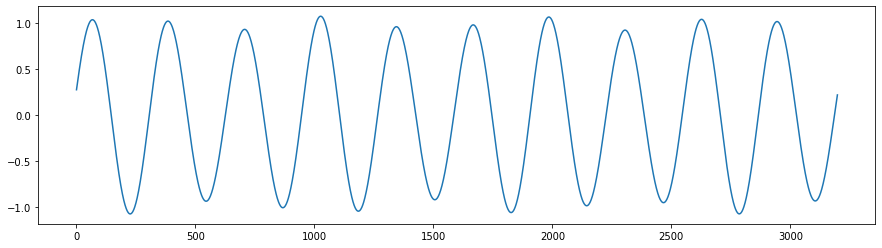

In [86]:
plt.rcParams["figure.figsize"] = (15,4)

# stuff = pqmodel.pqmodel_df(num_samples=30)

index = 9008

print('Class:', train_df['class'][index])
plt.plot(list(train_df.iloc[index,3:]))